In [6]:
###In this notebook, we are going to explore certain encoding/ embedding techniques for text data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 



In [7]:
###Preprocessing the text data

#loading the dataset
text_df = pd.read_csv('Text_data_pml.csv')

In [8]:
text_df.head()

,Raw_Text
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...
1,\nIn article <1993Apr19.131102.7843@rchland.ib...
2,\nYou can get a *little* UV by putting a heavy...
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...
4,\n\n\nI understand that the new GPS boxes now ...


In [9]:
####Preprocessing text data
import re

#function to remove email ids and special characters
def clean_text(text):

    ## lowercasing the text
    text = text.lower()

    # Remove email addresses
    text = re.sub(r'\b[\w.-]+@[\w.-]+\.\w+\b', '', text)

    # Remove special characters (keep only letters, numbers,spaces and dollar) and replacing with space
    #text = re.sub(r'[^a-zA-Z0-9\s\$]', ' ', text)

    #keeping only letters, numbers
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

In [10]:
cleaned_text = text_df['Raw_Text'].apply(clean_text)
text_df['cleaned_text'] = cleaned_text
text_df.head()

,Raw_Text,cleaned_text
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,in article callec dradja writes i am a bit ner...
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,in article r j traff writes in article darius ...
2,\nYou can get a *little* UV by putting a heavy...,you can get a little uv by putting a heavy uv ...
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntp posting host access digex net the trouble...
4,\n\n\nI understand that the new GPS boxes now ...,i understand that the new gps boxes now have a...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

/Users/kaushikchakraborty/Desktop/github/ePGD-IITB/epgd/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
from sklearn.metrics import silhouette_score

In [13]:
# Preprocessing function
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

True

In [14]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [15]:
from nltk.tokenize import word_tokenize


In [16]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kaushikchakraborty/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
def preprocess_text(text):
    

    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

   
    
    # Tokenize, remove stopwords, and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words]
    return ' '.join(tokens)

In [18]:
text_df['transformed_text']= text_df['cleaned_text'].apply(preprocess_text)
text_df.head()

,Raw_Text,cleaned_text,transformed_text
0,\nIn article <93089.204431GRV101@psuvm.psu.edu...,in article callec dradja writes i am a bit ner...,article callec dradja writes bit nervous posti...
1,\nIn article <1993Apr19.131102.7843@rchland.ib...,in article r j traff writes in article darius ...,article r j traff writes article darius lecoin...
2,\nYou can get a *little* UV by putting a heavy...,you can get a little uv by putting a heavy uv ...,get little uv putting heavy uv filter deep pur...
3,NNTP-Posting-Host: access.digex.net\n\nThe tro...,nntp posting host access digex net the trouble...,nntp posting host access digex net trouble try...
4,\n\n\nI understand that the new GPS boxes now ...,i understand that the new gps boxes now have a...,understand new gps box option known differenti...


In [19]:
##Bag of Words vectorization function
def count_vectorize(df):
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(df['transformed_text']).toarray()
    df['count_vector'] = list(vectors)
    vocabulary = vectorizer.vocabulary_  # Get the vocabulary

    return vectors, vocabulary

# Word2Vec vectorization function
def word2vec_vectorize(df):
    tokenized = df['transformed_text'].apply(lambda x: x.split())
    model = Word2Vec(sentences=tokenized, vector_size=300, window=5, min_count=1, workers=4)
    
    def vectorize(text):
        words = text.split()

        return np.mean([model.wv[word] for word in words if word in model.wv] or [np.zeros(100)], axis=0)

    df['word2vec'] = df['transformed_text'].apply(vectorize)
    return np.array(df['word2vec'].tolist())


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(df, text_column='transformed_text', max_features=1000):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    tfidf_vectors = tfidf_vectorizer.fit_transform(df[text_column]).toarray()
    df['tfidf_vector'] = list(tfidf_vectors)
    return tfidf_vectors

In [21]:
# Generate vectorizations
count_vectors, vocab = count_vectorize(text_df)
word2vec_vectors = word2vec_vectorize(text_df)
tfidf_vectors = tfidf_vectorize(text_df)

In [22]:
word2vec_vectors


array([[-0.03217274,  0.29250446,  0.0650157 , ..., -0.09252904,
         0.19882372,  0.06526224],
       [-0.03503551,  0.31369156,  0.07067606, ..., -0.11133385,
         0.2191318 ,  0.05222861],
       [-0.02044165,  0.25203684,  0.07121485, ..., -0.07315978,
         0.18997389,  0.0408027 ],
       ...,
       [-0.0307145 ,  0.26981935,  0.04851993, ..., -0.08837116,
         0.16737168,  0.06965999],
       [-0.02184422,  0.23342067,  0.0592505 , ..., -0.0687407 ,
         0.16735134,  0.04806671],
       [-0.03917154,  0.26104206,  0.01620804, ..., -0.08359773,
         0.12439838,  0.10415157]], dtype=float32)

In [23]:
##doing PCA on the word2vec vectors
from sklearn.decomposition import PCA
def pca_transform(vectors, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_vectors = pca.fit_transform(vectors)
    return transformed_vectors



In [24]:
pca_word2vec = pca_transform(word2vec_vectors, n_components=2)

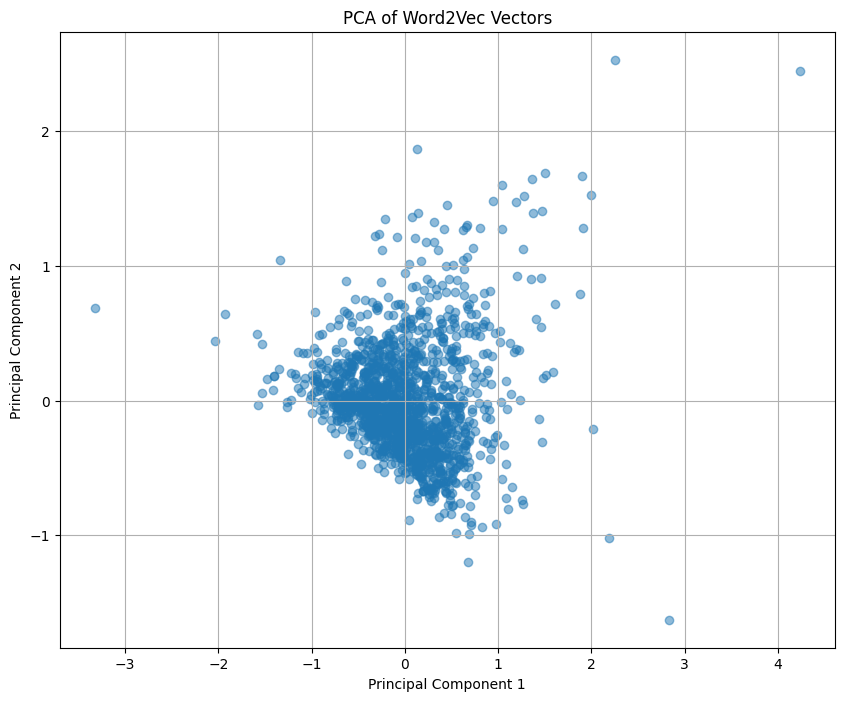

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_word2vec[:, 0], pca_word2vec[:, 1], alpha=0.5)
plt.title('PCA of Word2Vec Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [ ]:
##Using transformers for text embedding using all-minilm-l6-v2
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
# embeddings = model.encode(sentences)
# print(embeddings)



/Users/kaushikchakraborty/Desktop/github/ePGD-IITB/epgd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[[ 6.76568598e-02  6.34958297e-02  4.87131067e-02  7.93049783e-02
   3.74480113e-02  2.65280320e-03  3.93748730e-02 -7.09846662e-03
   5.93614243e-02  3.15370299e-02  6.00980595e-02 -5.29051945e-02
   4.06067595e-02 -2.59308368e-02  2.98427884e-02  1.12689065e-03
   7.35149756e-02 -5.03819771e-02 -1.22386612e-01  2.37028506e-02
   2.97265295e-02  4.24768850e-02  2.56338120e-02  1.99518562e-03
  -5.69191091e-02 -2.71598846e-02 -3.29035446e-02  6.60248399e-02
   1.19007148e-01 -4.58791442e-02 -7.26215392e-02 -3.25839706e-02
   5.23413867e-02  4.50552739e-02  8.25298857e-03  3.67023759e-02
  -1.39415516e-02  6.53919578e-02 -2.64272708e-02  2.06367142e-04
  -1.36643462e-02 -3.62809375e-02 -1.95043348e-02 -2.89738607e-02
   3.94270420e-02 -8.84091035e-02  2.62421300e-03  1.36713693e-02
   4.83062677e-02 -3.11565325e-02 -1.17329165e-01 -5.11690639e-02
  -8.85287598e-02 -2.18961891e-02  1.42986337e-02  4.44167741e-02
  -1.34814559e-02  7.43392557e-02  2.66382992e-02 -1.98762193e-02
   1.79190

(2, 384)

In [27]:
###performing bert based embeddings on our cleaned_text
bert_embeddings = model.encode(text_df['cleaned_text'].tolist())
bert_embeddings.shape

(1500, 384)

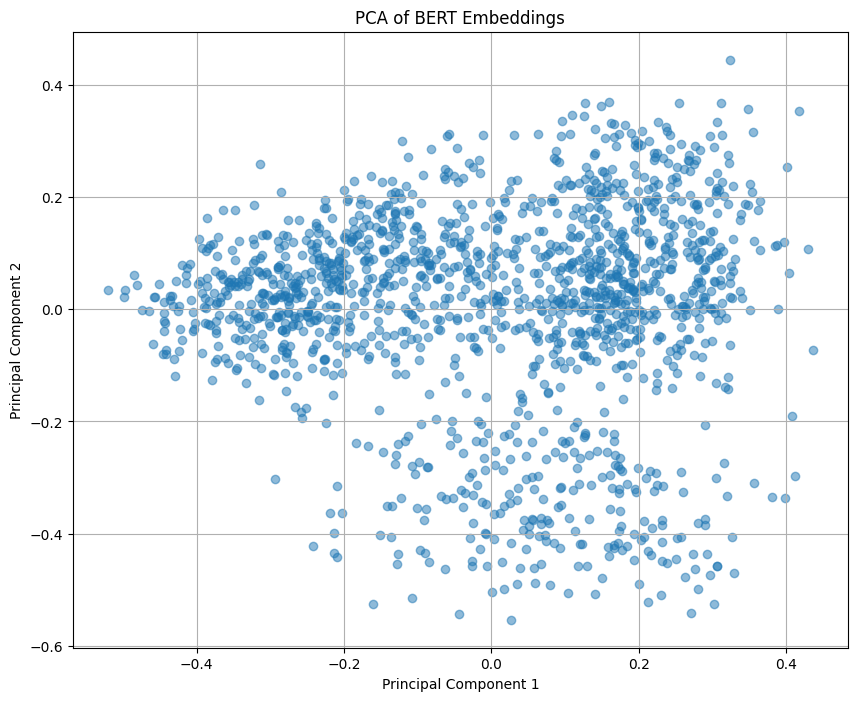

In [28]:
###PCA on the bert embeddings
pca_bert = pca_transform(bert_embeddings, n_components=2)
plt.figure(figsize=(10, 8))
plt.scatter(pca_bert[:, 0], pca_bert[:, 1], alpha=0.5)
plt.title('PCA of BERT Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

In [29]:
###using t-SNE for visualization
from sklearn.manifold import TSNE
def tsne_transform(vectors, n_components=2, perplexity=30):
    tsne = TSNE(n_components=n_components, perplexity=perplexity)
    transformed_vectors = tsne.fit_transform(vectors)
    return transformed_vectors

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


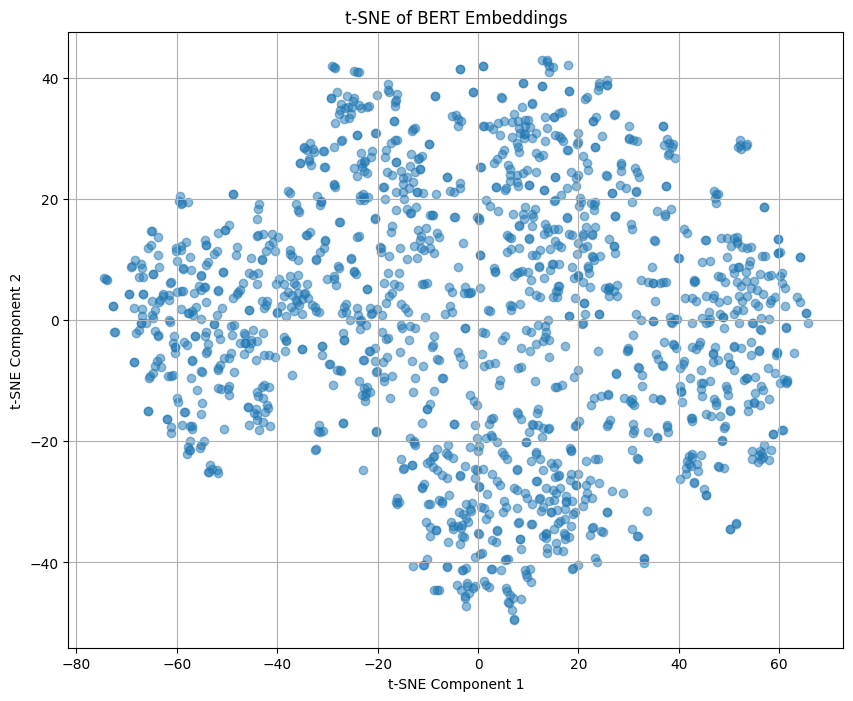

In [30]:
##tsne on bert embeddings
tsne_bert = tsne_transform(bert_embeddings, n_components=2)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_bert[:, 0], tsne_bert[:, 1], alpha=0.5)
plt.title('t-SNE of BERT Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

In [31]:
###Applying KMeans clustering on the bert embeddings
from sklearn.cluster import KMeans
def kmeans_clustering(vectors, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    kmeans.fit(vectors)
    return kmeans.labels_

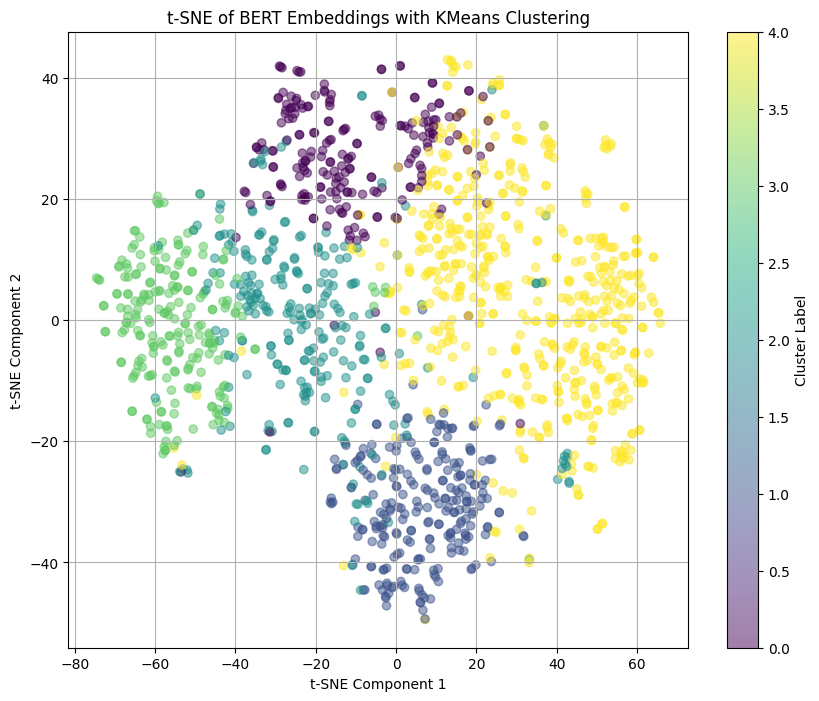

In [32]:
##Kmeans
kmeans_labels = kmeans_clustering(bert_embeddings, n_clusters=5)
text_df['kmeans_labels'] = kmeans_labels
text_df.head()
plt.figure(figsize=(10, 8))
plt.scatter(tsne_bert[:, 0], tsne_bert[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE of BERT Embeddings with KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

In [33]:
#checking embeddings for transformed text
transformed_text_embeddings = model.encode(text_df['transformed_text'].tolist())
transformed_text_embeddings.shape

(1500, 384)

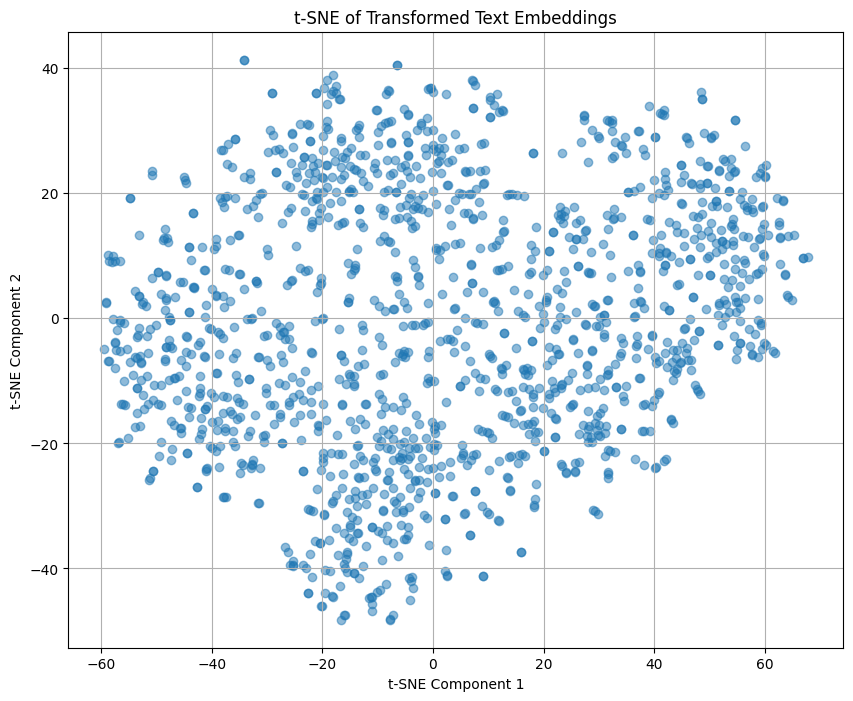

In [34]:
##tsne on transformed text embeddings
tsne_transformed_text = tsne_transform(transformed_text_embeddings, n_components=2)
plt.figure(figsize=(10, 8))
plt.scatter(tsne_transformed_text[:, 0], tsne_transformed_text[:, 1], alpha=0.5)
plt.title('t-SNE of Transformed Text Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

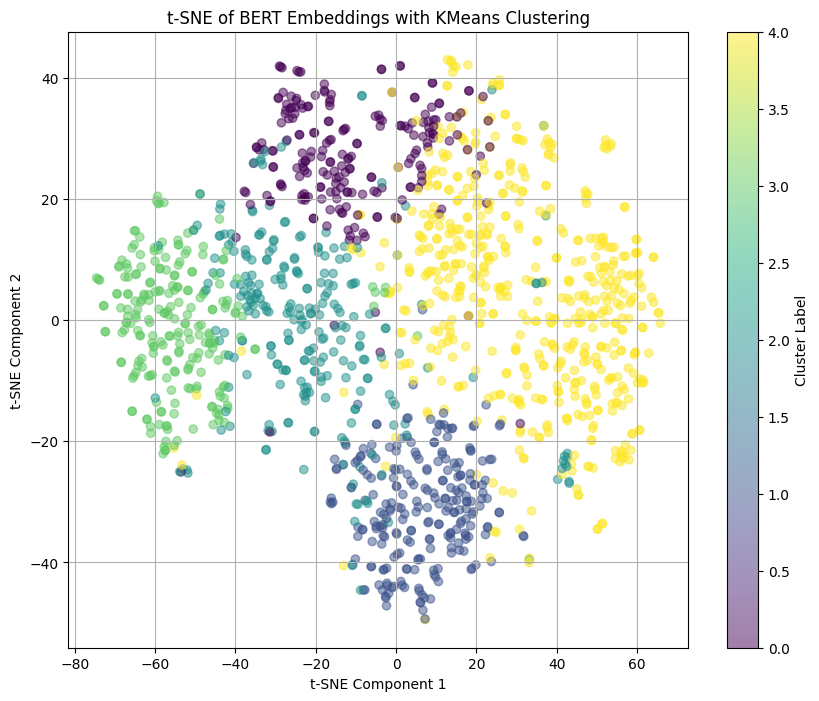

In [35]:
##Kmeans
kmeans_labels = kmeans_clustering(bert_embeddings, n_clusters=5)
text_df['kmeans_labels'] = kmeans_labels
text_df.head()
plt.figure(figsize=(10, 8))
plt.scatter(tsne_bert[:, 0], tsne_bert[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE of BERT Embeddings with KMeans Clustering')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

In [36]:
##Labelling dataset via k-means results
text_df['kmeans_labels'] = kmeans_labels
text_df['kmeans_labels'].value_counts()

kmeans_labels
4    557
2    260
1    239
3    230
0    214
Name: count, dtype: int64

In [ ]:
##Calculating silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(bert_embeddings, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.04


In [38]:
##Training a classifier on the k-means labels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [39]:
##random forest classifier
X_train, X_test, y_train, y_test = train_test_split(bert_embeddings, kmeans_labels, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


              precision    recall  f1-score   support

           0       0.90      0.71      0.79        38
           1       0.92      0.92      0.92        38
           2       0.92      0.65      0.77        55
           3       1.00      0.85      0.92        52
           4       0.79      1.00      0.88       117

    accuracy                           0.86       300
   macro avg       0.91      0.83      0.86       300
weighted avg       0.88      0.86      0.86       300

Accuracy: 0.86


In [40]:
###Using MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlp):.2f}')

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.93      1.00      0.96        38
           2       0.96      0.95      0.95        55
           3       0.96      0.94      0.95        52
           4       0.98      0.97      0.97       117

    accuracy                           0.96       300
   macro avg       0.95      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Accuracy: 0.96


In [41]:
###Using DT Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth=100,random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')


              precision    recall  f1-score   support

           0       0.44      0.53      0.48        38
           1       0.57      0.61      0.59        38
           2       0.51      0.51      0.51        55
           3       0.65      0.62      0.63        52
           4       0.73      0.69      0.71       117

    accuracy                           0.61       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.62      0.61      0.62       300

Accuracy: 0.61
